Limpieza de Datos


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/MarathonData.csv')

In [3]:
df

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
1039,1040,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
1040,1041,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
1041,1042,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
1042,1043,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [4]:
df['Name']

0           Blair MORGAN
1          Robert Heczko
2          Michon Jerome
3          Daniel Or lek
4           Luk ? Mr zek
              ...       
1039    Stefano Vegliani
1040      Andrej Madliak
1041          Yoi Ohsako
1042          Simon Dunn
1043         Pavel ?imek
Name: Name, Length: 1044, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1044 non-null   int64  
 1   Marathon       1044 non-null   object 
 2   Name           1044 non-null   object 
 3   Category       972 non-null    object 
 4   km4week        1044 non-null   float64
 5   sp4week        1044 non-null   float64
 6   CrossTraining  156 non-null    object 
 7   Wall21         1044 non-null   object 
 8   MarathonTime   1044 non-null   float64
 9   CATEGORY       1044 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 81.7+ KB


In [6]:
df['Wall21'] = pd.to_numeric(df['Wall21'],errors='coerce')

In [7]:
df.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,1044.000000,1044.000000,1044.000000,972.000000,1044.000000
mean,522.500000,62.347126,139.840706,1.630617,3.319080
std,301.521144,26.813496,1185.128514,0.209294,0.374931
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,261.750000,43.200000,11.472527,1.450000,3.040000
50%,522.500000,58.800000,12.163424,1.620000,3.320000
75%,783.250000,78.200000,12.878981,1.760000,3.620000
max,1044.000000,137.500000,11125.000000,2.050000,3.980000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'Wall21'}>],
       [<Axes: title={'center': 'MarathonTime'}>, <Axes: >]], dtype=object)

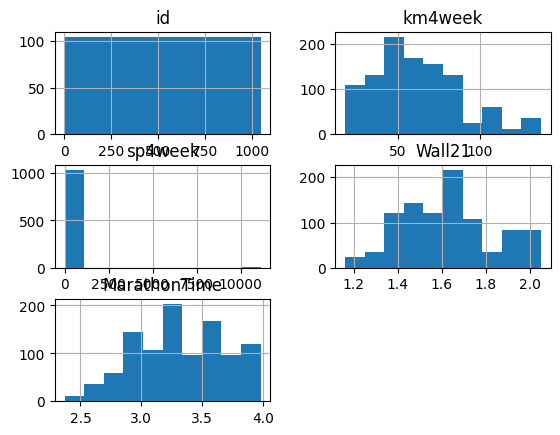

In [8]:
df.hist()

In [9]:
df = df.drop(columns=['Name'])
df = df.drop(columns=['id'])
df = df.drop(columns=['Marathon'])
df = df.drop(columns=['CATEGORY'])
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
1039,M55,50.0,10.830325,NaN,2.02,3.93
1040,M40,33.6,10.130653,ciclista 3h,1.94,3.93
1041,M40,55.4,11.043189,NaN,1.94,3.94
1042,M45,33.2,11.066667,NaN,2.05,3.95


In [10]:
df.isna().sum()

Category          72
km4week            0
sp4week            0
CrossTraining    888
Wall21            72
MarathonTime       0
dtype: int64

In [11]:
df = df.dropna(subset=['Wall21'])

In [12]:
df['CrossTraining'] = df['CrossTraining'].fillna(0)
df

C:\Users\cvill\AppData\Local\Temp\ipykernel_1284\2309382136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrossTraining'] = df['CrossTraining'].fillna(0)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
1039,M55,50.0,10.830325,0,2.02,3.93
1040,M40,33.6,10.130653,ciclista 3h,1.94,3.93
1041,M40,55.4,11.043189,0,1.94,3.94
1042,M45,33.2,11.066667,0,2.05,3.95


In [13]:
df['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [14]:
valores_cross = {'CrossTraining':{'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
df.replace(valores_cross, inplace=True)
df

C:\Users\cvill\AppData\Local\Temp\ipykernel_1284\1930741664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(valores_cross, inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
1039,M55,50.0,10.830325,0,2.02,3.93
1040,M40,33.6,10.130653,2,1.94,3.93
1041,M40,55.4,11.043189,0,1.94,3.94
1042,M45,33.2,11.066667,0,2.05,3.95


In [15]:
df['Category'] = df['Category'].fillna(0)
df

C:\Users\cvill\AppData\Local\Temp\ipykernel_1284\2410524041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].fillna(0)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
1039,M55,50.0,10.830325,0,2.02,3.93
1040,M40,33.6,10.130653,2,1.94,3.93
1041,M40,55.4,11.043189,0,1.94,3.94
1042,M45,33.2,11.066667,0,2.05,3.95


In [16]:
df['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [17]:
valores_category = {'Category':{'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5, 'WAM':6}}
df.replace (valores_category, inplace=True)
df

C:\Users\cvill\AppData\Local\Temp\ipykernel_1284\3846648653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace (valores_category, inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
1039,5,50.0,10.830325,0,2.02,3.93
1040,3,33.6,10.130653,2,1.94,3.93
1041,3,55.4,11.043189,0,1.94,3.94
1042,2,33.2,11.066667,0,2.05,3.95


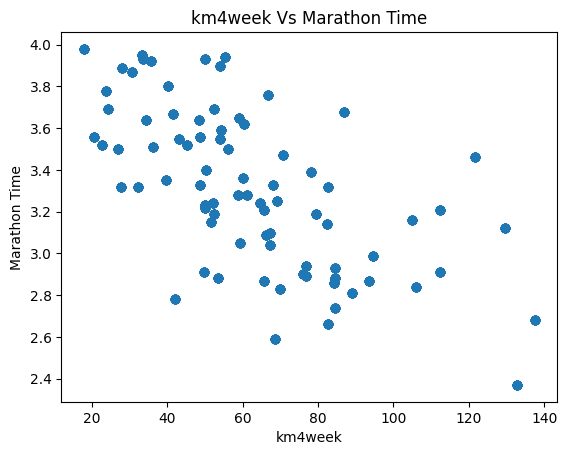

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x= df['km4week'], y= df['MarathonTime'])
plt.title('km4week Vs Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

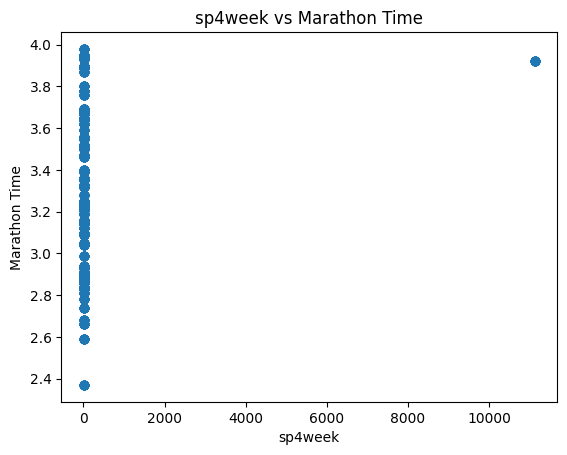

In [19]:
plt.scatter(x= df['sp4week'], y = df['MarathonTime'])
plt.title('sp4week vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [20]:
df = df.query('sp4week<1000')

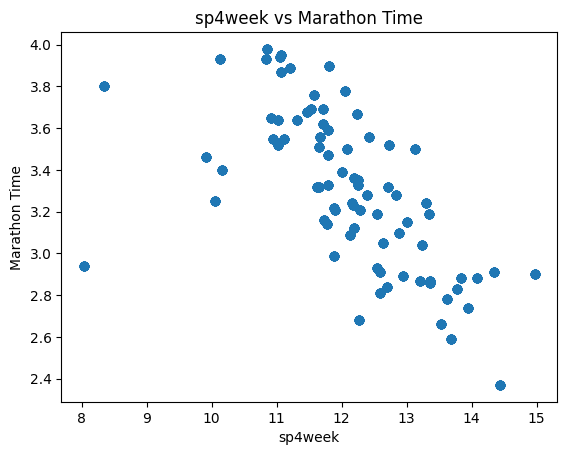

In [21]:
plt.scatter(x= df['sp4week'], y = df['MarathonTime'])
plt.title('sp4week vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

Text(0, 0.5, 'Marathon Time')

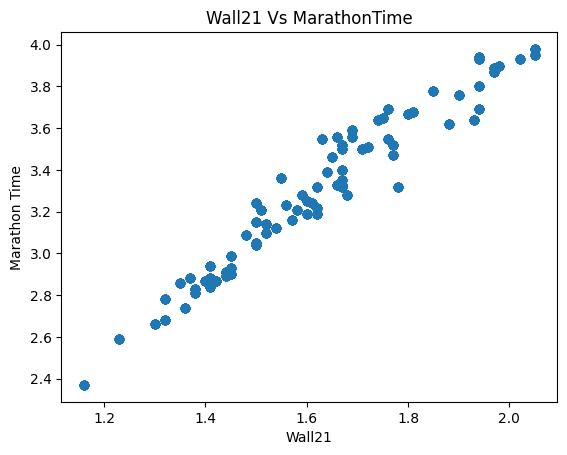

In [22]:
plt.scatter(x = df['Wall21'], y = df['MarathonTime'])
plt.title('Wall21 Vs MarathonTime')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')

In [23]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
1039,5,50.0,10.830325,0,2.02,3.93
1040,3,33.6,10.130653,2,1.94,3.93
1041,3,55.4,11.043189,0,1.94,3.94
1042,2,33.2,11.066667,0,2.05,3.95


In [24]:
datos_train = df.sample(frac=0.8,random_state=0)
datos_test = df.drop(datos_train.index)

In [25]:
etiquetas_train = datos_train.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [26]:
datos_train

,Category,km4week,sp4week,CrossTraining,Wall21
958,1,68.6,13.674419,0,1.23
441,3,89.0,12.594340,0,1.38
14,1,76.8,12.943820,0,1.44
768,6,52.3,11.708955,0,1.94
59,3,45.2,11.024390,0,1.77
...,...,...,...,...,...
126,6,69.2,10.053269,0,1.60
503,1,59.1,10.910769,0,1.75
26,6,129.6,12.188088,0,1.54
118,1,79.4,13.344538,0,1.60


In [32]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_train, etiquetas_train)

LinearRegression()

In [33]:
score_train = modelo.score(datos_train, etiquetas_train)
print(f'Puntuación en Train: {score_train}')

Puntuación en Train: 0.9526502923872388


In [34]:
predicciones_test = modelo.predict(datos_test)
score_test = modelo.score(datos_test, etiquetas_test)
print(f'Puntuación en Test: {score_test}')

Puntuación en Test: 0.9388204577999361


In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error

error_test = np.sqrt(mean_squared_error(etiquetas_test, predicciones_test))
print(f'Error porcentual en Test: {error_test * 100}')


Error porcentual en Test: 8.895710482798055


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

datos_train, datos_test, etiquetas_train, etiquetas_test = train_test_split(
    df[['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21']], df['MarathonTime'], test_size=0.2, random_state=42
)

pipelines = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso())
    ]),
}

param_grids = {
    'LinearRegression': {},
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'model__alpha': [0.1, 1.0, 10.0]},
    'DecisionTree': {'model__max_depth': [None, 10, 20, 30]},
    'RandomForest': {'model__n_estimators': [10, 50, 100]},
    'SVR': {'model__C': [0.1, 1.0, 10.0], 'model__kernel': ['linear', 'rbf']},
    'NeuralNetwork': {'model__hidden_layer_sizes': [(50,), (100,), (50, 50)], 'model__alpha': [0.0001, 0.001, 0.01]}
}

for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='r2')
    grid_search.fit(datos_train, etiquetas_train)

    train_score = grid_search.best_estimator_.score(datos_train, etiquetas_train)
    test_score = grid_search.best_estimator_.score(datos_test, etiquetas_test)

    print(f"Modelo: {model_name}")
    print(f"Mejores hiperparámetros: {grid_search.best_params_}")
    print(f"Puntuación en Train: {train_score}")
    print(f"Puntuación en Test: {test_score}")
    print("-" * 50)

Modelo: LinearRegression
Mejores hiperparámetros: {}
Puntuación en Train: 0.952680224854761
Puntuación en Test: 0.9374217347726534
--------------------------------------------------
Modelo: Ridge
Mejores hiperparámetros: {'model__alpha': 1.0}
Puntuación en Train: 0.9526776951161144
Puntuación en Test: 0.9374682129730834
--------------------------------------------------
Modelo: Lasso
Mejores hiperparámetros: {'model__alpha': 0.1}
Puntuación en Train: 0.8715918799996076
Puntuación en Test: 0.8681230213341482
--------------------------------------------------


Pickle de Ridge


In [40]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))  
])

ridge_model.fit(datos_train, etiquetas_train)

with open('ridge_model.pkl', 'wb') as model_file:
    pickle.dump(ridge_model, model_file)

with open('ridge_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

predictions = loaded_model.predict(datos_test)

Predicciones con el modelo entrenado

In [38]:
nuevo_corredor = pd.DataFrame(np.array([[1, 400, 15, 0, 1.4]]), columns=['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,15.0,0.0,1.4


In [39]:

with open('ridge_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

prediccion = loaded_model.predict(nuevo_corredor)

print("La predicción para el nuevo corredor es:", prediccion)

La predicción para el nuevo corredor es: [2.26911393]
